In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CoVIDStatewiseCount.csv')
df.tail(38)

,Date,State,Confirmed,Recovered,Death,Active
58,2020-03-28,Total,1021,85,24,912
59,2020-03-28,Kerala,182,12,1,169
60,2020-03-28,Maharashtra,186,25,6,155
61,2020-03-28,Karnataka,81,5,3,73
62,2020-03-28,Telangana,67,1,1,65
63,2020-03-28,Uttar Pradesh,65,11,0,54
64,2020-03-28,Rajasthan,54,3,0,51
65,2020-03-28,Gujarat,55,0,4,51
66,2020-03-28,Delhi,49,6,1,42
67,2020-03-28,Punjab,38,1,1,36


In [3]:
df_total = df.loc[df["State"]=="Total",:]
# df_total

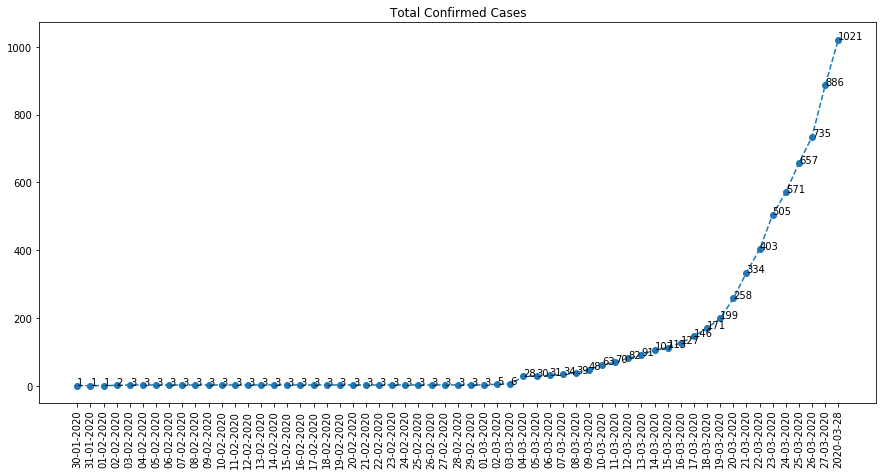

In [4]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
ax.set_title('Total Confirmed Cases')
ax.plot(df_total['Date'], df_total['Confirmed'], marker='o', linestyle='--')

for i,j in zip(df_total['Date'], df_total['Confirmed']):
    plt.text(i,j, str(j))
plt.xticks(rotation=90)
plt.show()

# fig, ax = plt.subplots(figsize=(15,5))
# sns.plot(x=df_total["Date"], y=df_total['Active'])

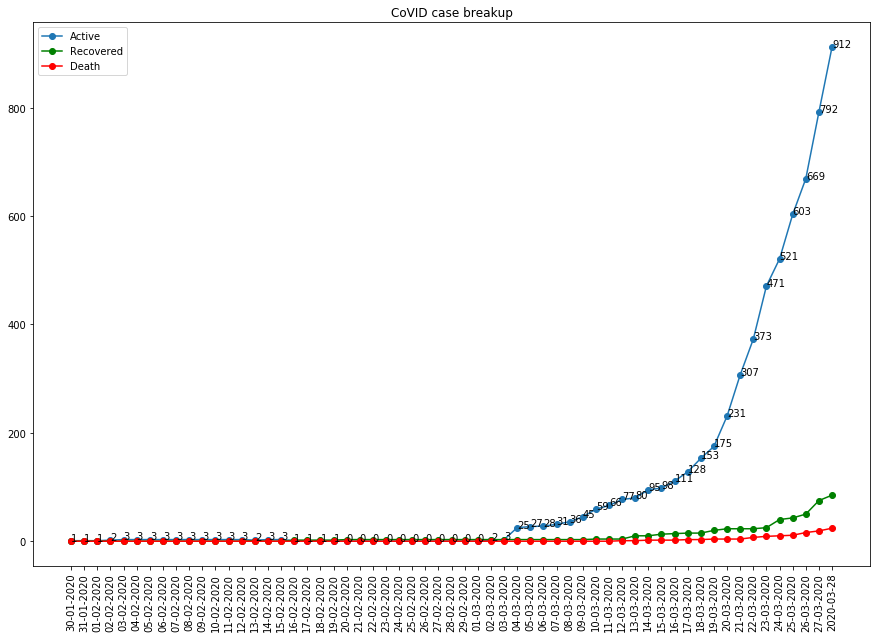

In [5]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.set_title('CoVID case breakup')

ax.plot(df_total['Date'], df_total['Active'], marker='o')
for i,j in zip(df_total['Date'], df_total['Active']):
    plt.text(i,j, str(j))
    
ax.plot(df_total['Date'], df_total['Recovered'], marker='o', color = 'green')
ax.plot(df_total['Date'], df_total['Death'], marker='o', color = 'red')

plt.legend(['Active', 
            'Recovered',   
            'Death'])
plt.xticks(rotation=90)
plt.show()